In [306]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from scipy import fftpack
import os

In [307]:
STEP = 8
QUALITY_FACTOR = float(40/6)

DC_COEF = """ 0 2 00
              1 3 010
              2 3 011
              3 3 100
              4 3 101
              5 3 110
              6 4 1110
              7 5 11110
              8 6 111110
              9 7 1111110
              10 8 11111110
              11 9 111111110"""

ILUMINANCE_TABLE_STR = """ 0,0 4 1010
                            0,2 2 01
                            0,1 2 00
                            0,3 3 100
                            0,4 4 1011
                            0,5 5 11010
                            0,6 7 1111000
                            0,7 8 11111000
                            0,8 10 1111110110
                            0,9 16 1111111110000010
                            0,10 16 1111111110000011
                            1,1 4 1100
                            1,2 5 11011
                            1,3 7 1111001
                            1,4 9 111110110
                            1,5 11 11111110110
                            1,6 16 1111111110000100
                            1,7 16 1111111110000101
                            1,8 16 1111111110000110
                            1,9 16 1111111110000111
                            1,10 16 1111111110001000
                            2,1 5 11100
                            2,2 8 11111001
                            2,3 10 1111110111
                            2,4 12 111111110100
                            2,5 16 1111111110001001
                            2,6 16 1111111110001010
                            2,7 16 1111111110001011
                            2,8 16 1111111110001100
                            2,9 16 1111111110001101
                            2,10 16 1111111110001110
                            3,1 6 111010
                            3,2 9 111110111
                            3,3 12 111111110101
                            3,4 16 1111111110001111
                            3,5 16 1111111110010000
                            3,6 16 1111111110010001
                            3,7 16 1111111110010010
                            3,8 16 1111111110010011
                            3,9 16 1111111110010100
                            3,10 16 1111111110010101
                            4,1 6 111011
                            4,2 10 1111111000
                            4,3 16 1111111110010110
                            4,4 16 1111111110010111
                            4,5 16 1111111110011000
                            4,6 16 1111111110011001
                            4,7 16 1111111110011010
                            4,8 16 1111111110011011
                            4,9 16 1111111110011100
                            4,10 16 1111111110011101
                            5,1 7 1111010
                            5,2 11 11111110111
                            5,3 16 1111111110011110
                            5,4 16 1111111110011111
                            5,5 16 1111111110100000
                            5,6 16 1111111110100001
                            5,7 16 1111111110100010
                            5,8 16 1111111110100011
                            5,9 16 1111111110100100
                            5,10 16 1111111110100101
                            6,1 7 1111011
                            6,2 12 111111110110
                            6,3 16 1111111110100110
                            6,4 16 1111111110100111
                            6,5 16 1111111110101000
                            6,6 16 1111111110101001
                            6,7 16 1111111110101010
                            6,8 16 1111111110101011
                            6,9 16 1111111110101100
                            6,10 16 1111111110101101
                            7,1 8 11111010
                            7,2 12 111111110111
                            7,3 16 1111111110101110
                            7,4 16 1111111110101111
                            7,5 16 1111111110110000
                            7,6 16 1111111110110001
                            7,7 16 1111111110110010
                            7,8 16 1111111110110011
                            7,9 16 1111111110110100
                            7,10 16 1111111110110101
                            8,1 9 111111000
                            8,2 15 111111111000000
                            8,3 16 1111111110110110
                            8,4 16 1111111110110111
                            8,5 16 1111111110111000
                            8,6 16 1111111110111001
                            8,7 16 1111111110111010
                            8,8 16 1111111110111011
                            8,9 16 1111111110111100
                            8,10 16 1111111110111101
                            9,1 9 111111001
                            9,2 16 1111111110111110
                            9,3 16 1111111110111111
                            9,4 16 1111111111000000
                            9,5 16 1111111111000001
                            9,6 16 1111111111000010
                            9,7 16 1111111111000011
                            9,8 16 1111111111000100
                            9,9 16 1111111111000101
                            9,10 16 1111111111000110
                            10,1 9 111111010
                            10,2 16 1111111111000111
                            10,3 16 1111111111001000
                            10,4 16 1111111111001001
                            10,5 16 1111111111001010
                            10,6 16 1111111111001011
                            10,7 16 1111111111001100
                            10,8 16 1111111111001101
                            10,9 16 1111111111001110
                            10,10 16 1111111111001111
                            11,1 10 1111111001
                            11,2 16 1111111111010000
                            11,3 16 1111111111010001
                            11,4 16 1111111111010010
                            11,5 16 1111111111010011
                            11,6 16 1111111111010100
                            11,7 16 1111111111010101
                            11,8 16 1111111111010110
                            11,9 16 1111111111010111
                            11,10 16 1111111111011000
                            12,1 10 1111111010
                            12,2 16 1111111111011001
                            12,3 16 1111111111011010
                            12,4 16 111111111101101
                            12,5 16 1111111111011100
                            12,6 16 1111111111011101
                            12,7 16 1111111111011110
                            12,8 16 1111111111011111
                            12,9 16 1111111111100000
                            12,10 16 1111111111100001
                            13,1 11 11111111000
                            13,2 16 1111111111100010
                            13,3 16 1111111111100011
                            13,4 16 1111111111100100
                            13,5 16 1111111111100101
                            13,6 16 1111111111100110
                            13,7 16 1111111111100111
                            13,8 16 1111111111101000
                            13,9 16 1111111111101001
                            13,10 16 1111111111101010
                            14,1 16 1111111111101011
                            14,2 16 1111111111101100
                            14,3 16 1111111111101101
                            14,4 16 1111111111101110
                            14,5 16 1111111111101111
                            14,6 16 1111111111110000
                            14,7 16 1111111111110001
                            14,8 16 1111111111110010
                            14,9 16 1111111111110011
                            14,10 16 1111111111110100
                            15,0 11 11111111001
                            15,1 16 1111111111110101
                            15,2 16 1111111111110110
                            15,3 16 1111111111110111
                            15,4 16 1111111111111000
                            15,5 16 1111111111111001
                            15,6 16 1111111111111010
                            15,7 16 1111111111111011
                            15,8 16 1111111111111100
                            15,9 16 1111111111111101
                            15,10 16 1111111111111110"""

aux_list = []
temp_list = []

for elem in ILUMINANCE_TABLE_STR.split():
    temp_list.append(elem)
    if len(temp_list) == 3:
        aux_list.append(temp_list)
        temp_list = []

AC_ILUMINANCE_TABLE = pd.DataFrame(aux_list)
AC_ILUMINANCE_TABLE.columns = ["Tuple", "CodeLength", "Code"]

aux_list = []
temp_list = []

for elem in DC_COEF.split():
    temp_list.append(elem)
    if len(temp_list) == 3:
        aux_list.append(temp_list)
        temp_list = []

DC_ILUMINANCE_TABLE = pd.DataFrame(aux_list)
DC_ILUMINANCE_TABLE.columns = ["Size", "CodeLength", "Code"]

In [308]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())


def psnr(predictions, targets):
    rmsev = rmse(predictions, targets)
    return 20 * np.log10(255/rmsev)


def fill_image(img, step):
    if img.shape[0] % step != 0:
        tmp_zeros_y = np.zeros(
            shape=(step - img.shape[0] % step, img.shape[1]))
        img = np.concatenate((img, tmp_zeros_y))
    if img.shape[1] % step != 0:
        tmp_zeros_x = np.zeros(
            shape=(img.shape[0], step - img.shape[1] % step))
        img = np.concatenate((img, tmp_zeros_x), axis=1)
    return img


def calc_entropy(block):
    return round(np.log2(len(np.unique(block))))


def generate_quantization_matrix(Q):
    # Define S com base em Q
    if Q < 50:
        S = 5000.0 / Q
    else:
        S = 200.0 - 2*Q

    # Matriz base Tb
    Tb = np.array([[16, 11, 10, 16, 24, 40, 51, 61],
                   [12, 12, 14, 19, 26, 58, 60, 55],
                   [14, 13, 16, 24, 40, 57, 69, 56],
                   [14, 17, 22, 29, 51, 87, 80, 62],
                   [18, 22, 37, 56, 68, 109, 103, 77],
                   [24, 35, 55, 64, 81, 104, 113, 92],
                   [49, 64, 78, 87, 103, 121, 120, 101],
                   [72, 92, 95, 98, 112, 100, 103, 99]])

    Ts = np.floor((S * Tb + 50) / 100)

    return np.clip(Ts, 1, 256)


def get_dct(img):
    return fftpack.dct(fftpack.dct(img.T, norm='ortho').T, norm='ortho')


def get_idct(coefficients):
    return fftpack.idct(fftpack.idct(coefficients.T, norm='ortho').T, norm='ortho')


def zigzag_to_matrix(zigzag):
    zeros = np.zeros((8, 8))
    rows = 0
    cols = 0
    counter = 0

    while (counter < len(zigzag)):
        if ((cols + rows) % 2 == 0):
            while ((rows >= 0) & (rows < zeros.shape[0]) & (cols >= 0) & (cols < zeros.shape[1])):
                zeros[rows][cols] = zigzag[counter]
                counter += 1
                if (cols + 1 == zeros.shape[1]):
                    rows += 1
                    break

                if (rows == 0):
                    cols += 1
                    break

                else:
                    rows -= 1
                    cols += 1

        else:
            while ((rows >= 0) & (rows < zeros.shape[0]) & (cols >= 0) & (cols < zeros.shape[1])):
                zeros[rows][cols] = zigzag[counter]
                counter += 1
                if (rows + 1 == zeros.shape[0]):
                    cols += 1
                    break

                if (cols == 0):
                    rows += 1
                    break

                else:
                    rows += 1
                    cols -= 1

    return zeros


def entropy_encoding_number(num):
    if (num == 0):
        return ('', 0)
    num = int(num)
    for i in range(1, 12):
        if ((2**i - abs(num) > 0)):
            if (num < 0):
                return (bin(2**i - abs(num) - 1)[2:].zfill(i), i)
            else:
                return (bin(2**i - (2**i - abs(num)))[2:].zfill(i), i)


def entropy_decoding_number(bit_string):
    if (bit_string == ''):
        return 0
    binary = int(bit_string, 2)
    tmp = int(bin(2**len(bit_string)), 2)
    if (binary < tmp >> 1):
        num = tmp - binary - 1
        num = -1 * num
    else:
        num = int(bit_string, 2)
    return num


def DPCM(array):
    for i in range(len(array) - 1, 0, -1):
        array[i] = array[i] - array[i-1]
    return np.array(array)


def entropy_encoding_dc_bin(dc_comp, prev):
    diff, size = entropy_encoding_number(dc_comp - prev)
    return str(DC_ILUMINANCE_TABLE.iloc[size]["Code"]) + str(diff) 


def DC_encoding(DCcoef):
    encodedDC = ""
    DPCM_DC = DPCM(DCcoef)

    for i in range(len(DPCM_DC)):
        elem, size = entropy_encoding_number(DPCM_DC[i])
        encodedDC += str(DC_ILUMINANCE_TABLE.iloc[size]["Code"]) + str(elem)

    return encodedDC


def RLE(array):

    elem_remaining = len(array)
    zeros_counter = 0
    RLE_array = []

    for elem in array:

        # contando os zeros
        if (elem == 0):
            zeros_counter += 1

        elif (elem != 0):
            elem_remaining -= (zeros_counter + 1)
            bits = entropy_encoding_number(elem)
            RLE_array.append((zeros_counter, bits[1], elem))
            zeros_counter = 0

        if (zeros_counter == elem_remaining):
            RLE_array.append((0, 0))

    return RLE_array


def AC_encoding(array):

    # aplicando RLE no array de input
    RLE_array = RLE(array)

    # string com o AC codificado
    encoded_AC = ""

    for tupla in RLE_array:
        if (tupla != (0, 0)) and (tupla[0] <= 15):

            string = ""
            string += str(tupla[0])
            string += ","
            string += str(tupla[1])
            pref_code = AC_ILUMINANCE_TABLE.loc[AC_ILUMINANCE_TABLE["Tuple"] == string]["Code"].item(
            )
            num_code = str(entropy_encoding_number(tupla[2])[0])
            encoded_AC += str(pref_code)
            encoded_AC += str(num_code)

        else:
            encoded_AC += "1010"
            return encoded_AC

    return encoded_AC


def save_bitstring(output_file, array):

    # escrevendo string de bits em binario
    buffer = bytearray()

    i = 0
    while i < len(array):
        buffer.append(int(array[i:i+8], 2))
        i += 8

    output_file.write(buffer)


def string_to_tuple(string):
    aux = ""
    tupla = [0, 0]
    i = 0
    for char in string:

        if (i == 0):
            if (char == ','):
                tupla[i] = int(aux)
                aux = ""
                i += 1

            if (char != ','):
                aux += char

        else:
            aux += char

    tupla[1] = int(aux)

    return tuple(tupla)


def rle_to_array(rle):

    elem_remaining = 64

    array = []

    for tuple in rle:

        if (tuple == (0, 0)):
            # completa o resto do array com 0's
            array.extend([0] * elem_remaining)

            return array

        else:

            array.extend([0] * tuple[0])
            array.append(tuple[2])

            elem_remaining -= (tuple[0]+1)

    array = np.array(array)

    return array


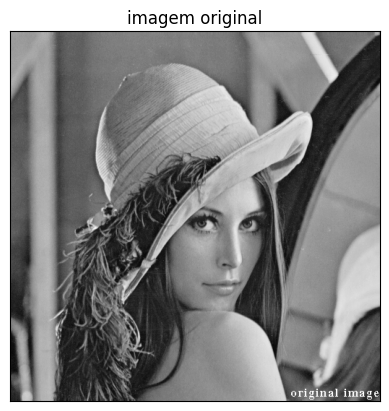

In [309]:
%matplotlib inline

input_file = "lena.pgm"
img = cv2.imread(input_file, cv2.IMREAD_GRAYSCALE)
img = img.astype(float)
plt.imshow(img, cmap='gray', clim=(0, 256))
plt.title('imagem original')
plt.xticks([])
plt.yticks([])
plt.show()
org_size = img.shape


In [310]:
filled_img = fill_image(img, STEP) - 128

bitstring = str()
# primeiros 4 bytes para armazenar o tamanho original da imagem
bitstring += str(bin(org_size[0])[2:].zfill(2 * 8)) + \
    str(bin(org_size[1])[2:].zfill(2 * 8))

size = filled_img.shape

print(bitstring)

00000010000000000000001000000000


In [311]:
np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)

DC_objects = []
AC_objects = []
entropy_values = []

for y in range(0, size[0], STEP):
    for x in range(0, size[1], STEP):
        dct = get_dct(filled_img[y:y+STEP, x:x+STEP])
        DC = dct[0, 0]

        block_entropy = calc_entropy(filled_img[y:y+STEP, x:x+STEP])
        QM = generate_quantization_matrix(
            float(block_entropy*QUALITY_FACTOR)).astype(float)
        coddct = np.divide(dct, QM).round()

        zigzag = np.concatenate(
            [np.diagonal(coddct[::-1, :], i)[::(2*(i % 2)-1)]
            for i in range(1-coddct.shape[0], coddct.shape[0])])
        
        entropy_values.append(bin(block_entropy)[2:].zfill(3))
        DC_objects.append(np.round(DC))
        AC_objects.append(AC_encoding(zigzag))

for e in entropy_values: bitstring += e
for a in AC_objects: bitstring += a
bitstring += DC_encoding(DC_objects)

encoded_file = open("lena.bin", "wb")
save_bitstring(encoded_file, bitstring)
encoded_file.close()

In [312]:
encoded_file = open("lena.bin", "rb")
bitstring = "".join(f"{n:08b}" for n in open("lena.bin", "rb").read())
print(bitstring)


0000001000000000000000100000000001110001101110010010010110010010010010010001101101110001110001101101101101101110001110001101101110010010010001101110010010110001101110001101101101101110110010110010010001110001110010010010010101110010010010010010110110010010010010010010010010001101110010010010010010010010010010010010010010010001110001110010010010110110010010010010001110001110110110010110010010010010010010010011010001110001110010010010010110010010010010010010010010001110001110010010010010010010010010010010010010010010010010010010010010010110010010001110001110001101111010010110110010010010010010011010010010001110010010010010010110010010010010010010010010010001110010010010010010010010010001110010010010010010010001110010010110010110110010001101101110010001110010110010110010010010010011010110010001110010010010001110010110010010010010010010010010010010010010010010010010010010010010010010010010001110010010001110010010010110010001101110010010001110010010110110110110010010111010010110010001110010

In [313]:
reconstructed_size = (int(bitstring[0:16], 2), int(bitstring[16:32], 2))
bitstring = bitstring[32:]

block_count = int(reconstructed_size[0] * reconstructed_size[1] / 64)

entropy_values = []
for i in range(0, block_count*3, 3):
    entropy_values.append(int(bitstring[i:i+3], 2))
bitstring = bitstring[block_count*3:]
    

[3, 4, 3, 3, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 3, 3, 3, 4, 3, 4, 3, 3, 3, 3, 3, 3, 4, 3, 4, 3, 3, 3, 4, 4, 4, 4, 3, 3, 4, 4, 5, 4, 3, 3, 4, 3, 3, 3, 3, 3, 5, 4, 5, 4, 4, 4, 3, 4, 3, 4, 4, 4, 4, 5, 3, 4, 4, 4, 4, 4, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 3, 4, 4, 4, 5, 5, 4, 4, 4, 4, 4, 3, 4, 3, 5, 5, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 6, 4, 3, 4, 3, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 3, 4, 3, 4, 3, 3, 6, 4, 5, 5, 4, 4, 4, 4, 4, 4, 6, 4, 4, 4, 3, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 5, 4, 5, 5, 4, 4, 3, 3, 3, 4, 4, 3, 4, 5, 4, 5, 4, 4, 4, 4, 4, 6, 5, 4, 4, 3, 4, 4, 4, 4, 3, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 5, 4, 4, 3, 3, 4, 4, 4, 3, 4, 4, 5, 5, 5, 5, 4, 4, 5, 6, 4, 5, 4, 4, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 4, 4, 4, 

145581
[256, 239, 215, 203, 241, 338, 316, 0, -332, -252, -227, -222, -224, -153, -86, -44, -14, -2, -12, 0, 16, 19, 11, 9, 26, 20, 16, -10, 3, -5, 20, 5, 9, -10, -16, -24, -24, -37, -92, -193, -97, 150, 236, 178, 196, 206, 189, 193, 207, 216, 404, 728, 516, -228, -124, -98, -87, -87, -69, -78, -56, -63, -101, 34, 221, 222, 216, 201, 267, 331, 276, -38, -353, -280, -234, -243, -243, -164, -93, -52, -33, -15, -8, -9, 2, 14, 4, 10, 2, -4, -1, -19, -6, -18, 11, -7, -9, -17, -30, -35, -33, -36, -83, -169, -203, 64, 223, 224, 232, 236, 211, 204, 195, 187, 209, 629, 724, 54, -181, -111, -96, -99, -83, -72, -52, -27, -311, -742, 216, 227, 223, 225, 300, 290, 239, -21, -353, -281, -228, -248, -250, -166, -101, -60, -27, -15, -6, -7, 0, 5, 5, -1, 3, -2, -4, -7, -8, -23, 26, 7, -5, -18, -24, -40, -26, -32, -72, -133, -221, -52, 188, 269, 259, 264, 236, 216, 193, 178, 164, 347, 728, 574, -180, -142, -101, -87, -70, -35, 10, -353, -756, -757, 225, 241, 242, 285, 305, 247, 246, -38, -376, -284, -23

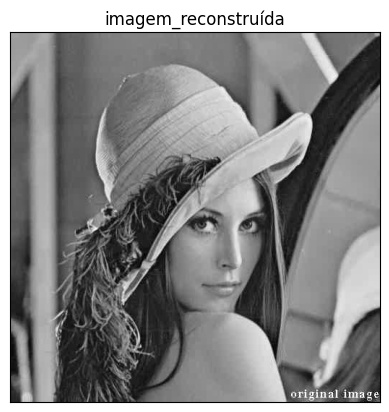

RMSE: 5.377
PSNR: 33.520
Taxa de Compressão: 10.224


In [314]:
aux = ""
pos = 0
rle = []

while (pos < len(bitstring) and block_count > 0):

    aux += bitstring[pos]

    # enquanto nao encontrar o fim de bloco
    if (aux != "1010"):

        # se encontrar um codigo na tabela dos AC
        if aux in AC_ILUMINANCE_TABLE['Code'].values:

            tupla = str(
                AC_ILUMINANCE_TABLE.loc[AC_ILUMINANCE_TABLE["Code"] == aux]["Tuple"].values[0])
            tupla = string_to_tuple(tupla)

            temp = pos+1
            number = bitstring[temp:(temp+tupla[1])]

            number = entropy_decoding_number(number)

            # adicionando ao vetor com rle encoding
            rle.append((tupla[0], tupla[1], number))

            pos += int(tupla[1])

            aux = ""

    # fim do bloco
    else:
        block_count -= 1
        rle.append((0, 0))
        aux = ""

    pos += 1

i = pos


aux = ""
DPCM = []
while (i < len(bitstring)):

    aux += bitstring[i]
    if (aux in DC_ILUMINANCE_TABLE['Code'].values):

        if aux == '00':
            DPCM.append(0)

        else:

            num_size = int(
                DC_ILUMINANCE_TABLE.loc[DC_ILUMINANCE_TABLE["Code"] == aux]['Size'].values[0])

            temp = i+1
            number = bitstring[temp:(temp + num_size)]
            number = entropy_decoding_number(number)
            DPCM.append(number)

            i += num_size
        aux = ""

    i += 1

j = 1

while j < len(DPCM):
    DPCM[j] = DPCM[j] + DPCM[j-1]
    j += 1

reconstructed_img = np.zeros(shape=reconstructed_size)
reconstructed_img = fill_image(reconstructed_img, STEP)

aux_list = []
x = 0
y = 0
counter = 0

for tup in rle:
    aux_list.append(tup)
    QM = generate_quantization_matrix(float(entropy_values[counter]*QUALITY_FACTOR))
    if (tup == (0, 0)):
        # Transformando o rle do bloco em array
        rle_array = rle_to_array(aux_list)

        # Transformando o array em uma matriz ordenando em zigzag
        aux_matrix = zigzag_to_matrix(rle_array)

        # Multiplica a matriz pela matriz QM padrão
        aux_matrix = np.multiply(aux_matrix, QM)

        # Substituindo o primeiro elemento pelo DC
        aux_matrix[0, 0] = DPCM[counter]

        # Fazendo a transformada inversa do cosseno
        aux_matrix = get_idct(aux_matrix)

        # Atribuindo a nova imagem
        reconstructed_img[y:y+STEP, x:x+STEP] = aux_matrix

        if (x == reconstructed_img.shape[1] - STEP & y == reconstructed_img.shape[0] - STEP):
            break

        x += STEP

        if (x == reconstructed_img.shape[1]):
            y += STEP
            x = 0

        aux_list = []
        counter += 1
        
reconstructed_img = reconstructed_img[:reconstructed_size[0], :reconstructed_size[1]] + 128

plt.imshow(reconstructed_img, cmap='gray', clim=(0, 255))
plt.title('imagem_reconstruída')
plt.xticks([])
plt.yticks([])
plt.show()

print("RMSE: %5.3f" % rmse(img, reconstructed_img))
print("PSNR: %5.3f" % psnr(img, reconstructed_img))

original_image_size = img.shape[0] * img.shape[1]
encoded_file_size = os.path.getsize("lena.bin")

print("Taxa de Compressão: %5.3f" %
      (original_image_size/encoded_file_size))
